In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
import numpy as np

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from keras import models, layers

In [10]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.6325 - acc: 0.6415 - val_loss: 0.5404 - val_acc: 0.8459
Epoch 2/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.5286 - acc: 0.7569 - val_loss: 0.4469 - val_acc: 0.8538
Epoch 3/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.4572 - acc: 0.8135 - val_loss: 0.3746 - val_acc: 0.8809
Epoch 4/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.3978 - acc: 0.8543 - val_loss: 0.3720 - val_acc: 0.8624
Epoch 5/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.3506 - acc: 0.8813 - val_loss: 0.3114 - val_acc: 0.8878
Epoch 6/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.3123 - acc: 0.9031 - val_loss: 0.2989 - val_acc: 0.8887
Epoch 7/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.2794 - acc: 0.9186 - val_loss: 0.2927 - 

In [14]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

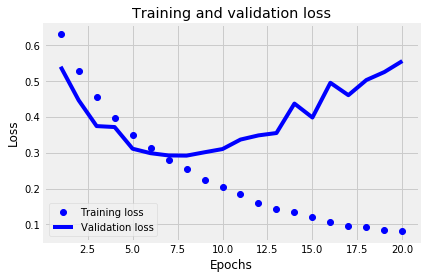

In [15]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

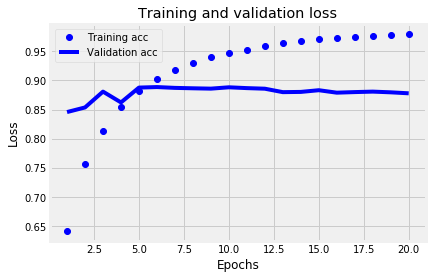

In [16]:
plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.5843 - acc: 0.6916
Epoch 2/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.4424 - acc: 0.8144
Epoch 3/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.3648 - acc: 0.8560
Epoch 4/4
25000/25000 [==============================] - 4s 142us/step


In [18]:
results

[0.27775351156711581, 0.88771999999999995]

In [19]:
# Trying model with three hidden layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 100us/step - loss: 0.6487 - acc: 0.6208
Epoch 2/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.5314 - acc: 0.7570
Epoch 3/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.4361 - acc: 0.8219
Epoch 4/4
25000/25000 [==============================] - 2s 98us/step


In [20]:
results # improved performance here

[0.29149481318950654, 0.88524000000000003]

In [28]:
# try with more hidden units
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 135us/step - loss: 0.4285 - acc: 0.8081
Epoch 2/4
25000/25000 [==============================] - 3s 120us/step - loss: 0.2357 - acc: 0.9064
Epoch 3/4
25000/25000 [==============================] - 3s 123us/step - loss: 0.1580 - acc: 0.9396
Epoch 4/4
25000/25000 [==============================] - 3s 123us/step


In [29]:
results # poor performance with more hidden units

[0.6192470670318604, 0.80016]

In [21]:
# trying this with mse loss instead of binary_crossentropy
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 90us/step - loss: 0.2033 - acc: 0.6881
Epoch 2/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.1420 - acc: 0.8216
Epoch 3/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.1107 - acc: 0.8681
Epoch 4/4
25000/25000 [==============================] - 3s 112us/step


In [22]:
results # good performance using mse 

[0.081757502481937402, 0.89051999999999998]

In [32]:
# use tanh instead of relu
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.4072 - acc: 0.8324
Epoch 2/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.2289 - acc: 0.9135
Epoch 3/4
25000/25000 [==============================] - 2s 78us/step - loss: 0.1763 - acc: 0.9351
Epoch 4/4
25000/25000 [==============================] - 1s 48us/step


In [33]:
results # performance is not as good

[0.326924485244751, 0.87752]